In [51]:
import os
import matplotlib.pyplot as plt
from scipy.optimize import linprog
from statsmodels.tsa.arima.model import ARIMA

path = os.getcwd().replace('Model', 'Results')

/usr/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/lib/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


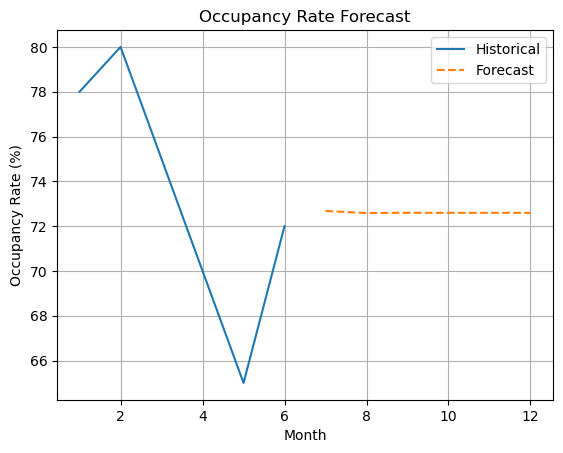

In [52]:
# 2. Time Series Analysis (Occupancy Forecasting)
occupancy_data = [78, 80, 75, 70, 65, 72]  # Input data on occupancy
model = ARIMA(occupancy_data, order=(1,1,1))  # Create ARIMA model with parameters (p=1, d=1, q=1)
fit = model.fit()  # Train the model on the input data
forecast = fit.forecast(steps=6)  # Forecast for the next 6 months

# Visualization of input data and forecast
plt.plot(range(1,7), occupancy_data, label='Historical')  # Input data
plt.plot(range(7,13), forecast, label='Forecast', linestyle='--')  # Forecast
plt.xlabel('Month')
plt.ylabel('Occupancy Rate (%)')
plt.title('Occupancy Rate Forecast')
plt.legend()
plt.grid(True)
plt.savefig(f'{path}/Occupancy Rate Forecast.jpg')
plt.show()

In [53]:
# 3. Optimization Model (Maximizing Revenue with Constraints on Personnel and Inventory)
c = [-50, -20]  # Coefficients for revenue from each worker and unit of inventory (negative for maximization)
A = [[1, 0], [0, 1]]  # Constraints on personnel and inventory (one constraint per variable)
b = [30, 500]  # Maximum allowed number of personnel and inventory
result = linprog(c, A_ub=A, b_ub=b, method='highs')  # Solve linear optimization

# Output optimal personnel and inventory distribution
print(f'Optimal Staffing: {result.x[0]}, Optimal Inventory: {result.x[1]}') 

Optimal Staffing: 30.0, Optimal Inventory: 500.0
